In [1]:
import cv2 as cv

In [2]:
import matplotlib.pyplot as plt

In [3]:
config_file = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model = 'frozen_inference_graph.pb'

In [4]:
model = cv.dnn_DetectionModel(frozen_model,config_file)

In [5]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5,127.5,127.5)) #input range of mobile net is [-1,1]
model.setInputSwapRB(True)

<dnn_Model 0000017E0910FB10>

In [6]:
classLabels = []
file = 'Labels.txt'
with open(file,'rt') as fl:
    classLabels = fl.read().rstrip('\n').split('\n')

In [7]:
print("Number of classes:", len(classLabels))
print(classLabels)

Number of classes: 80
['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


# Lets play with different test Images

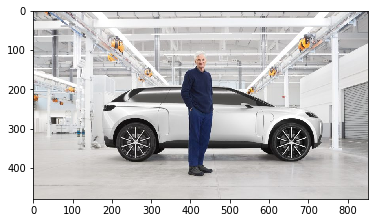

In [8]:
img = cv.imread('test1.jpg')
plt.imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB))

In [9]:
classIndex, confidence, bbox = model.detect(img,confThreshold = 0.5)

In [10]:
print("Labels detected are:",end =" ")
for la in classIndex.flatten():
    print("'{}'".format(classLabels[la-1]), end =" ")

Labels detected are: 'person' 'car' 

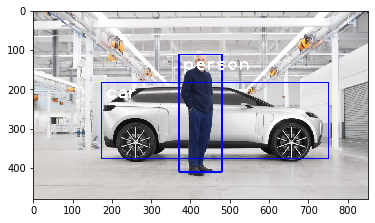

In [11]:
font_scale = 3
font = cv.FONT_HERSHEY_PLAIN
for classId, conf, box in zip(classIndex.flatten(),confidence.flatten(),bbox):
    cv.rectangle(img,box,(255,0,0),2)
    cv.putText(img,classLabels[classId-1],(box[0]+10,box[1]+40), font, fontScale = font_scale, color = (255,255,255),thickness = 3)
plt.imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB))

### Worked pretty well

### Let now give some more complicated images

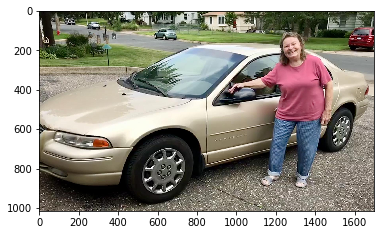

In [12]:
img = cv.imread('test2.jpg')
plt.imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB))

In [13]:
classIndex, confidence, bbox = model.detect(img,confThreshold = 0.5)
print("Labels detected are:",end =" ")
for la in classIndex.flatten():
    print("'{}'".format(classLabels[la-1]), end =" ")

Labels detected are: 'person' 'car' 'car' 'car' 'car' 'car' 'car' 

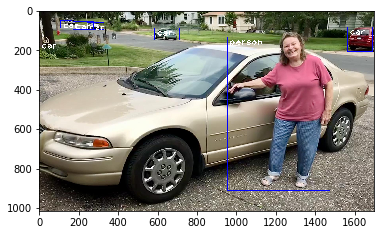

In [14]:
font_scale = 3
font = cv.FONT_HERSHEY_PLAIN
for classId, conf, box in zip(classIndex.flatten(),confidence.flatten(),bbox):
    cv.rectangle(img,box,(255,0,0),2)
    cv.putText(img,classLabels[classId-1],(box[0]+10,box[1]+40), font, fontScale = font_scale, color = (255,255,255),thickness = 3)
plt.imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB))

### Detected six cars but couldn't detect the main car in front and miss classified some areas as a car where there is no car.

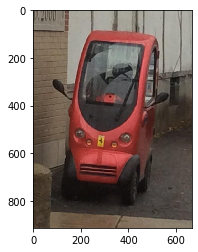

In [15]:
img = cv.imread('test3.jpg')
plt.imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB))

In [16]:
classIndex, confidence, bbox = model.detect(img,confThreshold = 0.5)
print("Labels detected are:",end =" ")
for la in classIndex.flatten():
    print("'{}'".format(classLabels[la-1]), end =" ")

Labels detected are: 'car' 'truck' 

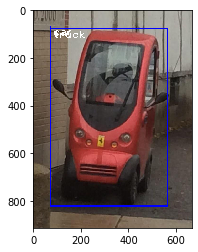

In [17]:

font_scale = 3
font = cv.FONT_HERSHEY_PLAIN
for classId, conf, box in zip(classIndex.flatten(),confidence.flatten(),bbox):
    cv.rectangle(img,box,(255,0,0),2)
    cv.putText(img,classLabels[classId-1],(box[0]+10,box[1]+40), font, fontScale = font_scale, color = (255,255,255),thickness = 3)
plt.imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB))

### Same bound is detected as car and truck. This is a limitation of object detection using bounding boxes that the same object can be classified as more than one class.

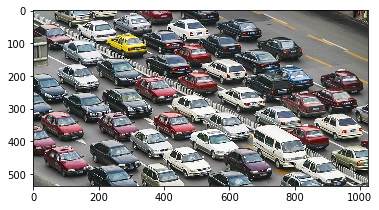

In [18]:
img = cv.imread('test6.jpg')
plt.imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB))

In [19]:
classIndex, confidence, bbox = model.detect(img,confThreshold = 0.5)
print("Labels detected are:",end =" ")
for la in classIndex.flatten():
    print("'{}'".format(classLabels[la-1]), end =" ")

Labels detected are: 'horse' 'zebra' 

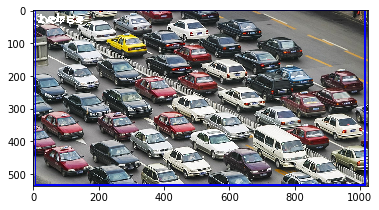

In [20]:
font_scale = 3
font = cv.FONT_HERSHEY_PLAIN
for classId, conf, box in zip(classIndex.flatten(),confidence.flatten(),bbox):
    cv.rectangle(img,box,(255,0,0),2)
    cv.putText(img,classLabels[classId-1],(box[0]+10,box[1]+40), font, fontScale = font_scale, color = (255,255,255),thickness = 3)
plt.imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB))

### In this test case, the model gets completely failed. Black and white colors of cars are interpreted as zebra stripes.